#1 Recrutamento preditivo
A empresa de tecnologia HighTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa. A HighTech vem investindo muito nos últimos anos no uso de ciência de dados no setor do RH para trazer ganhos no processo de seleção e recrutamento. O time de ciência de dados junto com o time de RH vem realizando juntos um projeto de recrutamento preditivo.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga.

#Problema de negócio:

O objetivo da HighTech é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais.

#Base de dados

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

#Desafio

Você como cientista de dados do time de dados da HighTech tem o desafio de criar um modelo preditivo de recrutamento para prever como e quais são as melhores variáveis que podem colocar um profissional bem qualificado na HighTech.

In [89]:
import pandas as pd

In [90]:
dados = pd.read_excel("/content/Recrutamento.xlsx")
dados.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0


In [91]:
dados.shape

(215, 15)

In [92]:
set(dados.status)

{'No', 'Yes'}

In [93]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [94]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [95]:
import missingno as msno

<Axes: >

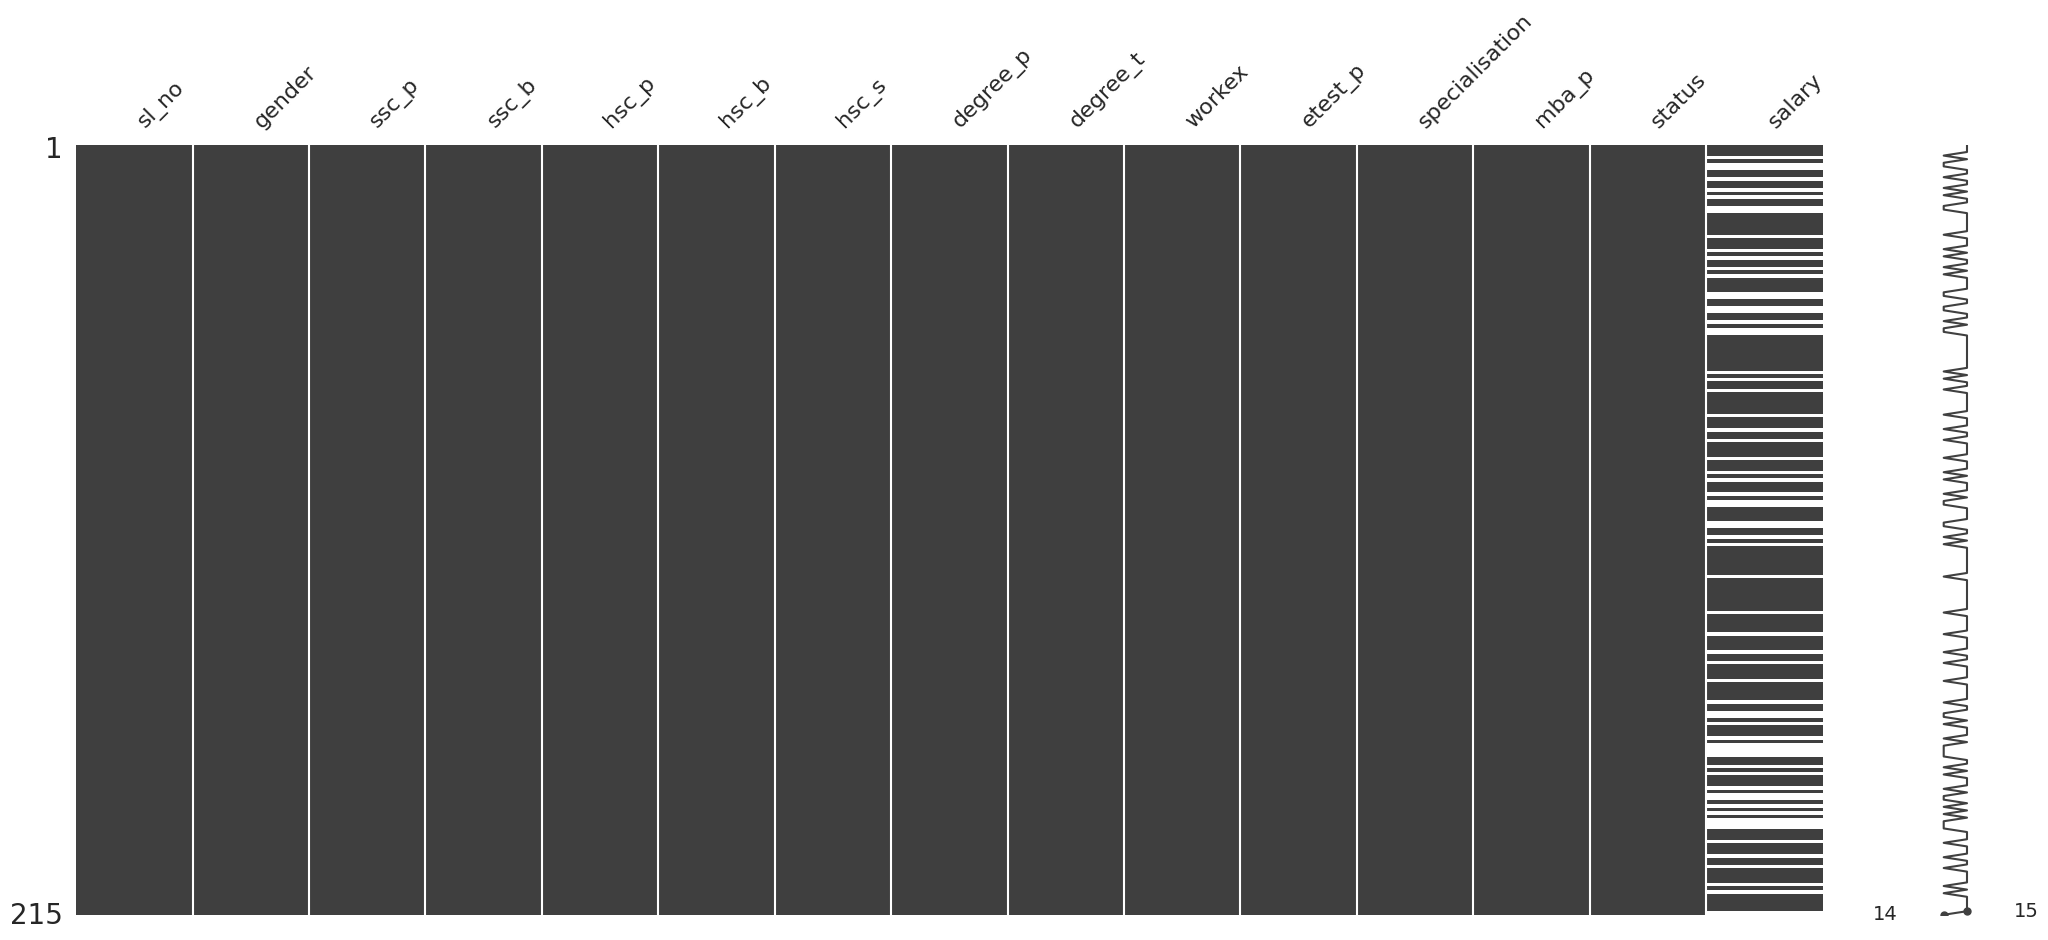

In [96]:
msno.matrix(dados)

In [97]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [98]:
import seaborn as sb

<Axes: xlabel='status', ylabel='salary'>

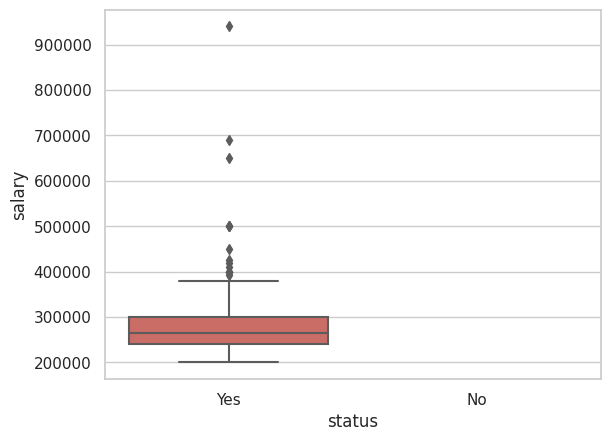

In [99]:
sb.boxplot(x="status", y="salary", data=dados, palette="hls")

In [100]:
dados["salary"].fillna(value=0, inplace=True)
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [101]:
dados.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<Axes: xlabel='hsc_p'>

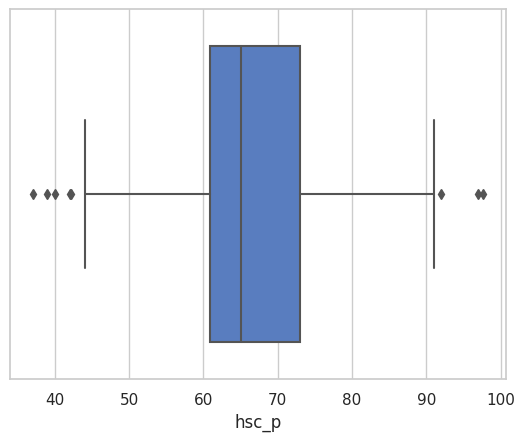

In [102]:
sb.boxplot(x=dados["hsc_p"])

<Axes: xlabel='hsc_p', ylabel='Count'>

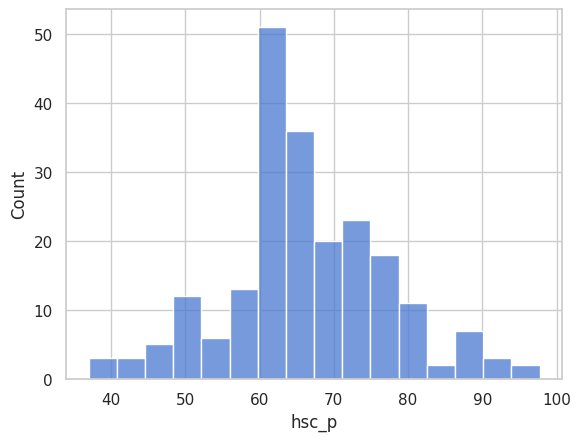

In [103]:
sb.histplot(data=dados, x="hsc_p")

<Axes: xlabel='degree_p'>

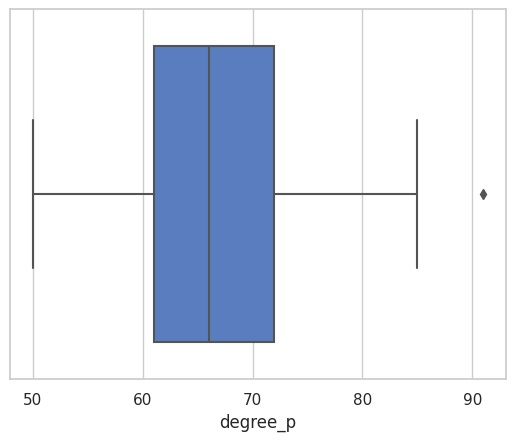

In [104]:
sb.boxplot(x=dados["degree_p"])

<Axes: xlabel='degree_p', ylabel='Count'>

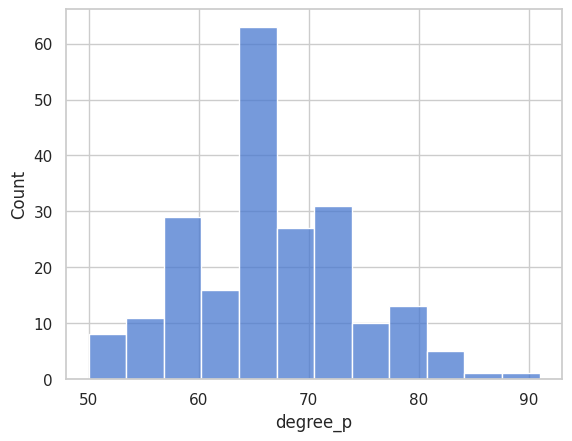

In [105]:
sb.histplot(data=dados, x="degree_p")

<Axes: xlabel='etest_p'>

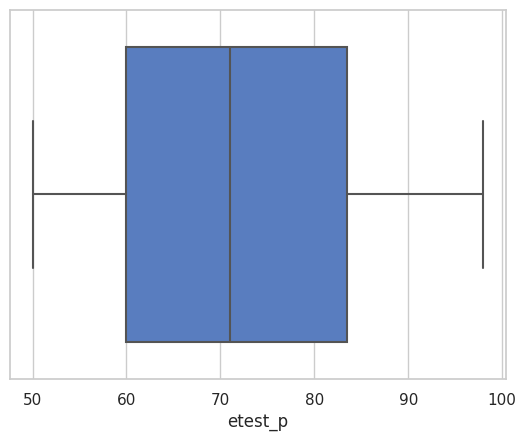

In [106]:
sb.boxplot(x=dados["etest_p"])

<Axes: xlabel='etest_p', ylabel='Count'>

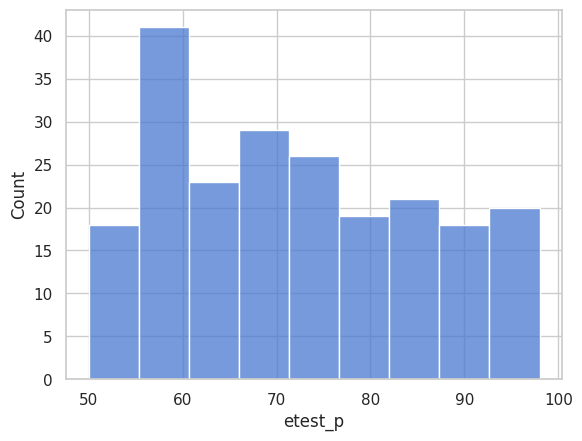

In [107]:
sb.histplot(data=dados, x="etest_p")

<Axes: xlabel='mba_p'>

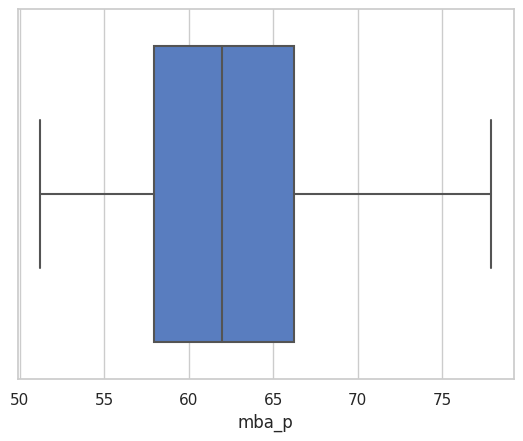

In [108]:
sb.boxplot(x=dados["mba_p"])

<Axes: xlabel='mba_p', ylabel='Count'>

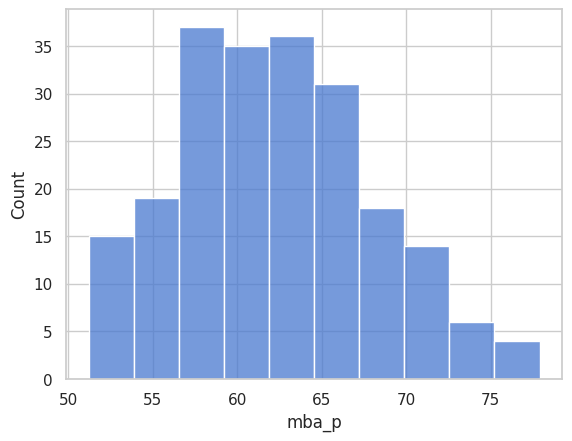

In [109]:
sb.histplot(data=dados, x="mba_p")

<Axes: xlabel='salary'>

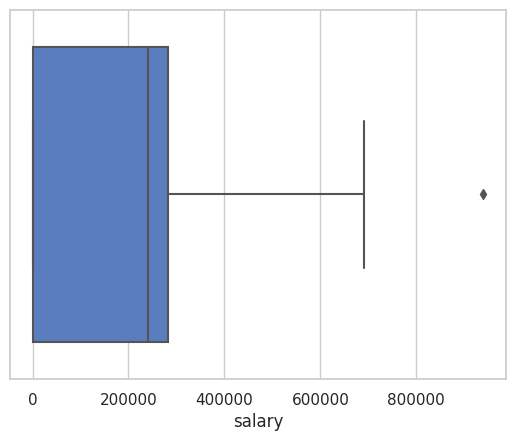

In [110]:
sb.boxplot(x=dados["salary"])

<Axes: xlabel='salary', ylabel='Count'>

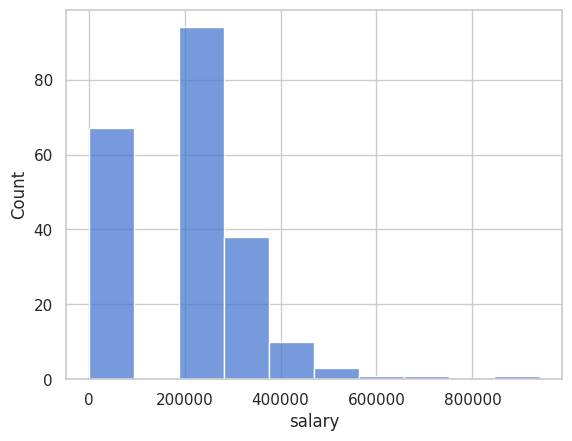

In [111]:
sb.histplot(data=dados, x="salary")

[Text(36.5, 0.5, 'Pontuação para MBA')]

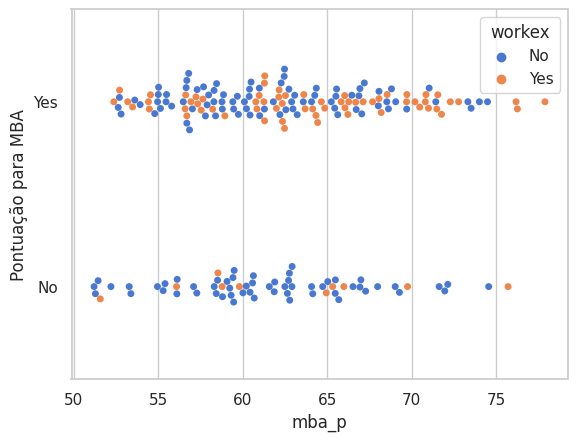

In [112]:
sb.set_theme(style="whitegrid", palette="muted")
ax=sb.swarmplot(data=dados, x="mba_p", y="status", hue="workex")
ax.set(ylabel="Pontuação para MBA")

In [113]:
! pip install plotly_express

In [114]:
import plotly_express as px

In [115]:
px.violin(dados, y="salary", x="specialisation", color="gender", box=True, points="all")

In [116]:
import matplotlib.pyplot as plt

<ipython-input-117-bc2a1c7b4439>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

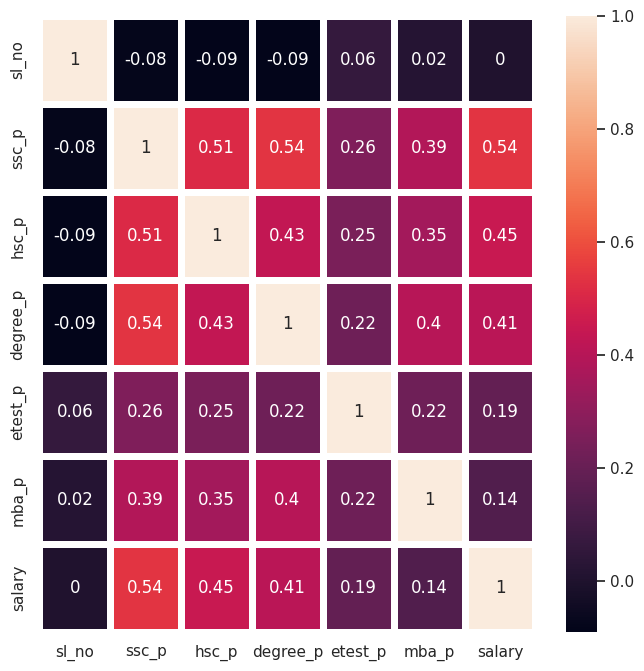

In [117]:
correlation_matriz = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data = correlation_matriz, annot=True, linewidths=5, ax=ax)
# sem informações das colunas com textos, preciso dar valores para os textos

In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [120]:
# para textos que podem sere repreentados de forma binaria (0 e 1) (LabelEncoder)
colunas=["gender", "workex", "specialisation", "status"]
label_encoder = LabelEncoder()
for col in colunas:
  dados[col] = label_encoder.fit_transform(dados[col])

In [121]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [122]:
# tratativa de dados para mais valores com mais opções de textos. (OnehotEncoder)
dummy_hsc_s = pd.get_dummies(dados["hsc_s"], prefix="dummy")
dummy_degree_t = pd.get_dummies(dados["degree_t"], prefix="dummy")

dados_dummy=pd.concat([dados, dummy_hsc_s, dummy_degree_t], axis=1)

In [123]:
dados_dummy.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,...,0,57.80,1,250000.0,1,0,0,1,0,0


In [124]:
dados_dummy.drop(["hsc_s", "degree_t", "salary"],axis=1, inplace=True)
dados_dummy.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1


<ipython-input-125-361d5f3ba5e9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

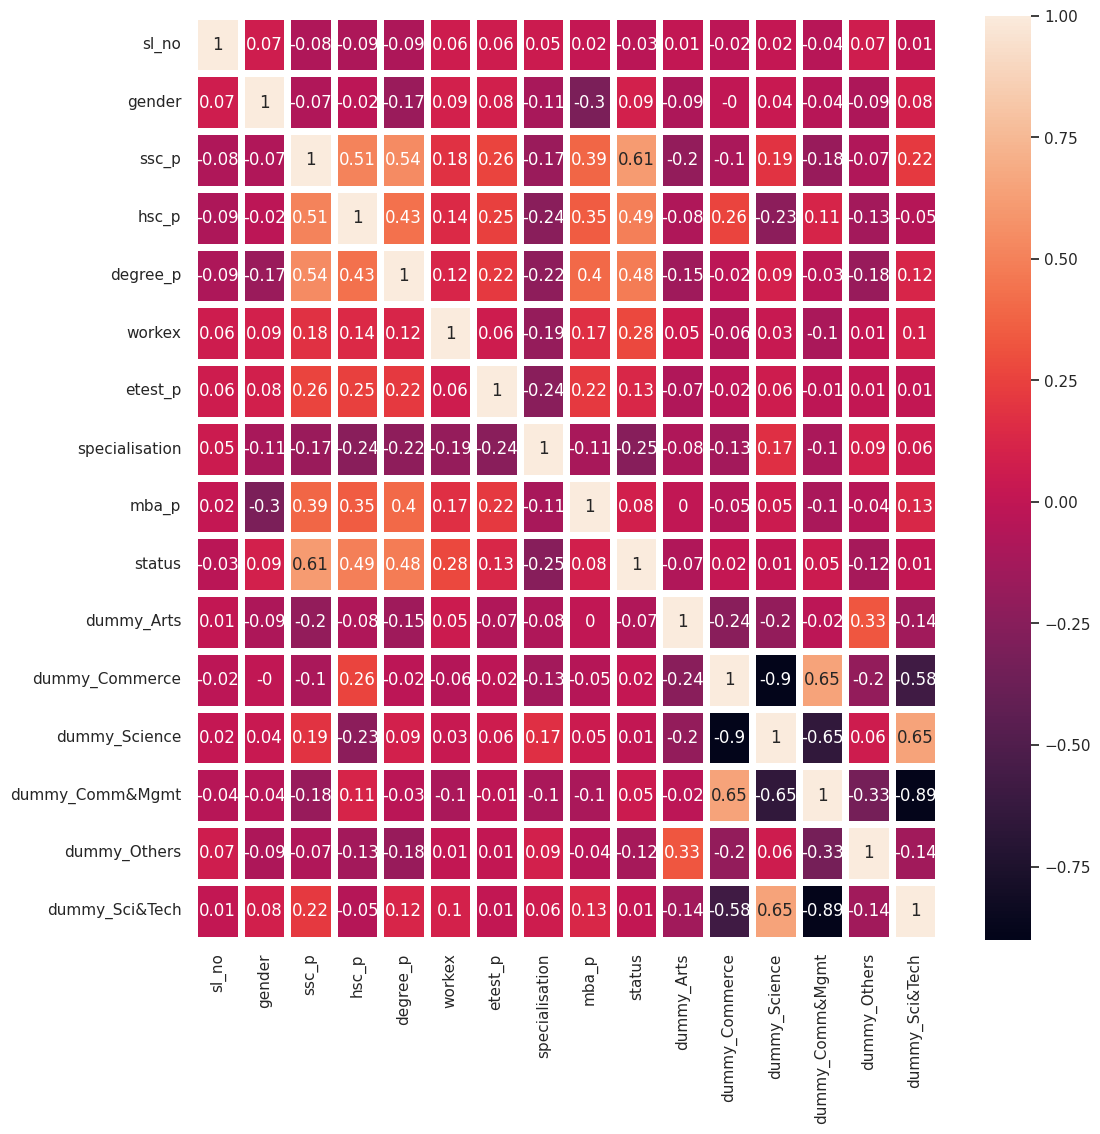

In [125]:
correlation_matriz = dados_dummy.corr().round(2)

fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data = correlation_matriz, annot=True, linewidths=5, ax=ax)
# COM informações das colunas com textos alteradas para numericas

In [127]:
x=dados_dummy[["ssc_p", "hsc_p", "degree_p", "workex", "mba_p"]]
y=dados_dummy["status"]

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=7)

In [130]:
x_train.shape

(172, 5)

In [133]:
y_train.shape

(172,)

In [134]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [135]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scalonado=scaler.transform(x_train)
x_test_scalonado = scaler.transform(x_test)

In [136]:
x

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,0,59.43
4,85.80,73.60,73.30,0,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,0,74.49
211,58.00,60.00,72.00,0,53.62
212,67.00,67.00,73.00,1,69.72
213,74.00,66.00,58.00,0,60.23


In [137]:
x_train_scalonado

array([[-1.92672757, -0.66933853, -0.31559155, -0.70402569, -0.11827471],
       [ 0.26708378, -0.33015908, -0.72064899, -0.70402569,  1.18141841],
       [-0.89983715, -0.57243011,  0.76456162, -0.70402569, -1.50694011],
       [ 1.06059001,  0.97810451,  2.51981052, -0.70402569,  1.18665207],
       [-1.4599592 , -1.54151426, -0.72064899, -0.70402569, -0.6521084 ],
       [ 0.30349171,  0.58853269, -0.09956092, -0.70402569,  1.63500259],
       [ 0.50046796, -0.76624694, -1.39574473, -0.70402569, -1.67790646],
       [ 1.80741941, -0.08788804,  1.97973393,  1.42040271,  1.83562636],
       [-0.05965408, -0.28170487, -0.31559155, -0.70402569, -0.06768263],
       [-0.43306878, -0.37861329, -0.18057241, -0.70402569, -0.27354006],
       [-0.43306878,  0.00902037, -0.31559155, -0.70402569,  0.31786392],
       [-0.52642246, -0.54045034, -0.28723753, -0.70402569, -0.39042522],
       [-1.55331288, -2.12296474, -1.26072558, -0.70402569, -1.88550845],
       [-0.7131298 , -0.28170487, -1.3

In [138]:
import numpy as np

#1.1 KNN

In [139]:
#função para descobrir o melhor K para a melhor precisão para o modelo
error = []
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_scalonado, y_train)
  pred_i = knn.predict(x_test_scalonado)
  error.append(np.mean(pred_i!= y_test))

Text(0, 0.5, 'Erro Médio')

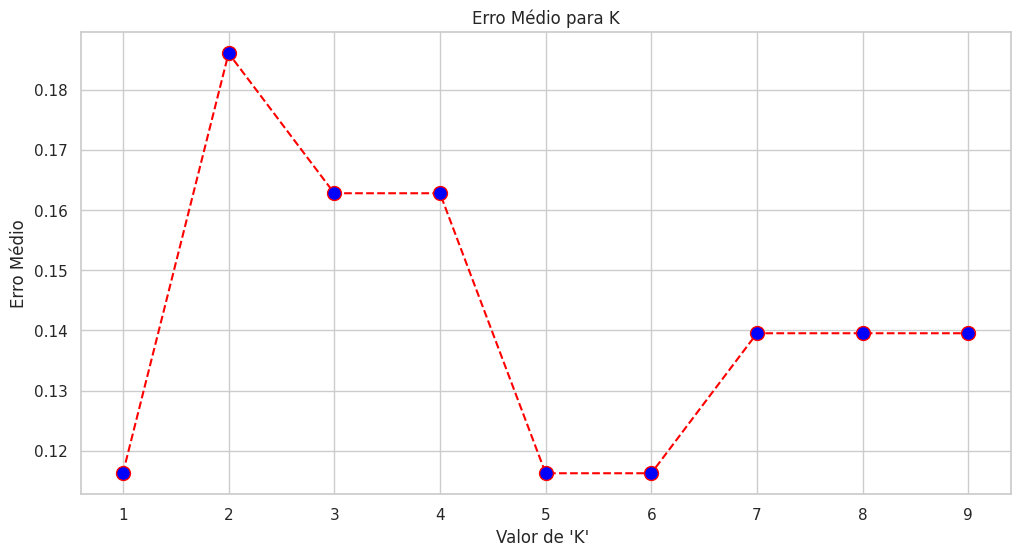

In [140]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title("Erro Médio para K")
plt.xlabel("Valor de 'K' ")
plt.ylabel("Erro Médio")

In [143]:
#modfelo com o K escolhido em n_neighborns = 5
modelo_classificador=KNeighborsClassifier(n_neighbors=5)
modelo_classificador.fit(x_train_scalonado, y_train)
y_predito=modelo_classificador.predict(x_test_scalonado)

In [144]:
y_predito

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [145]:
from sklearn.metrics import accuracy_score

In [146]:
print(accuracy_score(y_test, y_predito))

0.8837209302325582


#1.2 SVM

In [148]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [149]:
svm=Pipeline(
    [
        ("linear_svc", LinearSVC(C=1))
    ]
)

In [150]:
svm.fit(x_train_scalonado, y_train)

Pipeline(steps=[('linear_svc', LinearSVC(C=1))])

In [151]:
y_predito_svm=svm.predict(x_test_scalonado)

In [152]:
print(accuracy_score(y_test, y_predito_svm))

0.8604651162790697
